# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os
import matplotlib.image as mpimg

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Question1: Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

### Answer:
Please see the code above.  

I used the python build-in funcation len and Numpy function shape to calculate summary statistics of the traffic signs data set:

* The size of training set is 34799
* The size of validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,3)
* The number of unique classes/labels in the data set is 42

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

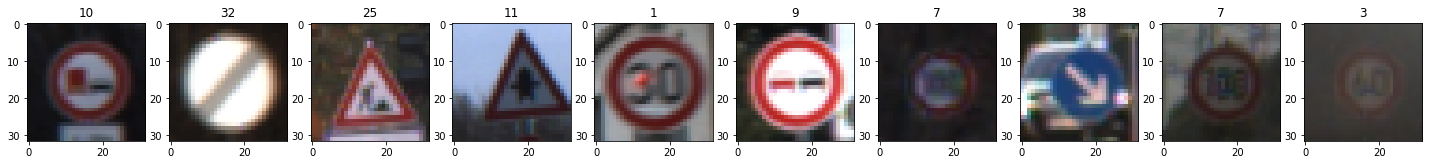

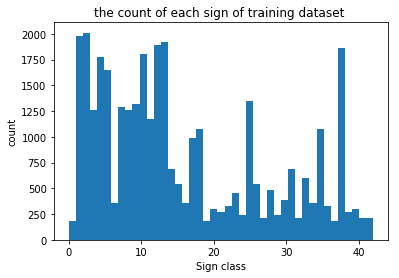

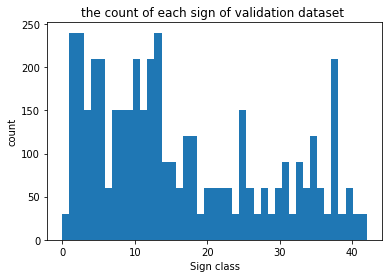

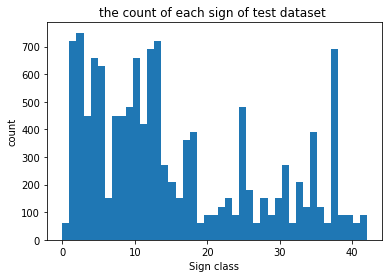

In [3]:
### Data exploration visualization code goes here.

# Visualizations will be shown in the notebook.
%matplotlib inline

#plotting traffic sign images
fig = plt.figure(figsize=(25,25))
for i in range(1,11):
    fig.add_subplot(1, 10, i) 
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.imshow(image)
    plt.title(y_train[index])
plt.show()
#plotting the count of each sign
#fig = plt.figure()
def plot_hist(y,n,title):
    plt.title(title)
    plt.xlabel("Sign class")
    plt.ylabel("count")
    plt.hist(y, n)
    plt.show()
plot_hist(y_train, n_classes, "the count of each sign of training dataset ")    
plot_hist(y_valid, n_classes, "the count of each sign of validation dataset ")   
plot_hist(y_test, n_classes, "the count of each sign of test dataset ")


### Question2: Include an exploratory visualization of the dataset and identify where the code is in your code file.

### Answer:
See the code above, it displays 10 different traffic sign by random choosing.
And also use histogram in matplotlib to plotting the count of each sign.
It shows there are 42 different class and some of the class appear 2,000 times.
We can also find out some class sample is lesser than other class in training dataset.
Lacking training data for these classes may make the model difficult to predict these classes after training.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### grayscale data
def gray_data(data):
    return np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in data])

### Normalization data
def norm_data(data):
    return data/128 -1

X_train, y_train = shuffle(X_train, y_train)
X_train_org = X_train
X_train_norm =  norm_data(X_train_org)
X_train_gray = gray_data(X_train_org)

X_train = X_train_norm
X_valid = norm_data(X_valid)
X_test = norm_data(X_test)

#### Verified Pre-process data

Plot image of class 19


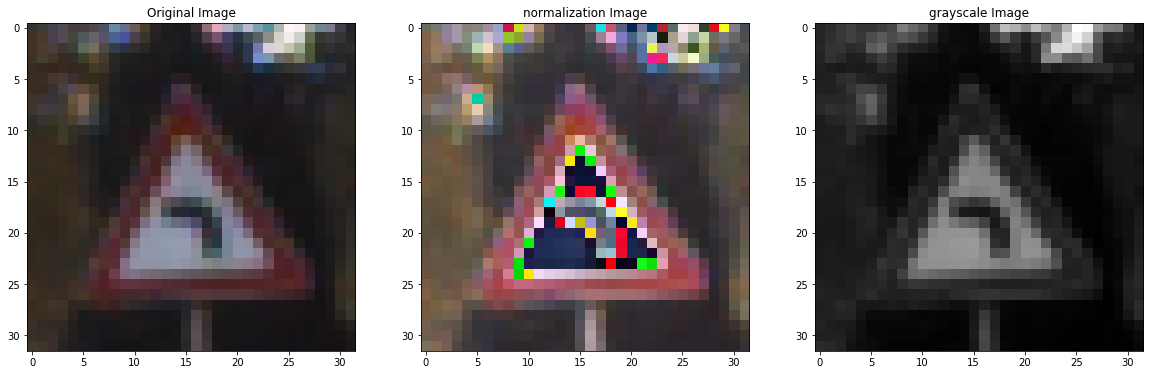

In [5]:
### Plot original data, normalized data, grayscale data
def plot_3_Datas(data1, data2, data3, label):
    index = random.randint(0, len(X_train))
    print ('Plot image of class', y_train[index])
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(1, 3, 1) 
    plt.imshow(data1[index].squeeze())
    plt.title('Original Image')
    fig.add_subplot(1, 3, 2) 
    plt.imshow(data2[index])
    plt.title('normalization Image')
    fig.add_subplot(1, 3, 3) 
    plt.title('grayscale Image')
    plt.imshow(data3[index], cmap='gray')
    plt.show()
    #print ('org',data1[index][0][0])
    #print ('norm',data2[index][0][0])
    #print ('gray',data3[index][0][0])
    
plot_3_Datas(X_train_org, X_train_norm, X_train_gray, y_train)    

### Question1: Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

### Answer:
The codes above shows how the preprocess the image data.
It also output the original image, normalization image and grayscale image.

For the grayscale, I use cv2 to convert the image to gray.
For the normalization, I normalized the image for [0:255] to [-1:1].

I tried grayscale first as my train data but the accuracy is pretty low.
Maybe the color channels will help the model to predict and we should keep this infor.

And then I use normalized data to train my model and get very good accuracy.
Which means equal variance and zero mean can really help to predict the image.

Besides, I forgot to preprocess the vaild and test dataset at the beginning which cause really low accuracy. And then I realize that I have to use the same preprocess method to all the data which I want to feed this model to get the consistent result.

### Split Data into Training, Validation and Testing Sets

In [6]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
#from sklearn.model_selection import train_test_split
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

### Question2: Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. 

### Answer:

I used sklearn bulid-in function train_test_split to split 20% train data to validation data before.
And then I found out SDC just updated the dataset and prepare the valid data for us, so I comment the above code.

Right now, there is 34799 set of images for train data, and 4410 set of images for validation set.
And I shuffle the training data before training the model.

### Model Architecture

In [16]:
### Define your architecture here.
# Parameters
mu = 0
sigma = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),        
    'out': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bd1': tf.Variable(tf.zeros(120)),
    'bd2': tf.Variable(tf.zeros(84)),
    'out': tf.Variable(tf.zeros(43))}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x, weights, biases, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer  
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Activation.
    conv1   = conv2d(x, weights['wc1'], biases['bc1'])   
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    # Layer 2: Convolutional. Output = 10x10x16.
    # Activation.
    conv2   = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)  
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.add(tf.matmul(fc0, weights['wd1']), biases['bd1'])
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])  
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits

### Question3: Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

### Answer:

The code above shows how I build the model using LeNet module + dropout method. 
I used truncated_normal for the weights with zero mean and 0.1 sigma and zero biases.

Here is how the LeNet model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					| Activation									|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					| Activation									|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16  					|
| Flatten	        	| Reshape, outputs 400    						|
| Fully connected		| outputs 120        							|
| RELU					| Activation									|
| Fully connected		| outputs 84        							|
| RELU					| Activation									|
| Dropout				| Probabilities 50% for dropout					|
| Output		        | outputs 43        							|
| Softmax				| softmax the output							|

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [17]:
# Parameters
EPOCHS = 10
BATCH_SIZE = 128
dropout = 0.5

# tf Graph input
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43) 

#Training Pipeline
rate = 0.001

# Model
logits = LeNet(x, weights, biases, keep_prob)

# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

# Model Evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples  
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

### Question4: Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

### Answer:
Above code shows how the parameter for train model and evaluate model.

I used AdamOptimizer with 0.001 learning rate.If we choose learning rate too big, it will compute fast but have potential to miss minimum value. If we choose learning rate too small it will take too much time. I tried several times and tweak learning rate at 0.001.

And I chose batch size is 128 and epochs number is 10. I had tried to enlarge epochs to 50, 100 but looks like the accuracy is high in train and valid dataset but low in test dataset which caused overfitting.
I want to avoid it so I think 10 epochs is fine. And batch size 128 is big enough for my computer :)

#### Train the Model

In [18]:
### Train model here.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.782
Validation Accuracy = 0.710

EPOCH 2 ...
Training Accuracy = 0.918
Validation Accuracy = 0.854

EPOCH 3 ...
Training Accuracy = 0.953
Validation Accuracy = 0.897

EPOCH 4 ...
Training Accuracy = 0.973
Validation Accuracy = 0.913

EPOCH 5 ...
Training Accuracy = 0.979
Validation Accuracy = 0.925

EPOCH 6 ...
Training Accuracy = 0.981
Validation Accuracy = 0.920

EPOCH 7 ...
Training Accuracy = 0.990
Validation Accuracy = 0.927

EPOCH 8 ...
Training Accuracy = 0.991
Validation Accuracy = 0.937

EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.932

EPOCH 10 ...
Training Accuracy = 0.994
Validation Accuracy = 0.944

Model saved


#### Test the Model

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.928


### Question5: Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

### Answer:

See above code for calculating the accuracy for training, validation and test sets.

My final model results were:
* training set accuracy of 0.994
* validation set accuracy of 0.944 
* test set accuracy of 0.928

I chose the LeNet model as my start point because it works well on the quiz to predict the image (CarND-LeNet-Lab).
If it doesn't works well I can try added more hidden layers or different architecture.
Luckily, it works like amazing well, I got 0.86 accuracy on the first try.

To improve the accuracy, I had tried to tuned the parameter like batch size, numbers of the epochs, mean and sigma of weights, added extra hidden layer like convolution layer or fully connected layer but doesn't goes well.
And then I take a look back the deep learning lecture, the lecture mention dropout will surprisingly working well and it really did!
I use 0.5 dropout rate to train my model and 1.0 for valid and test dataset. It helps me to improve my accuracy over 0.9.
If next time drop can't help me to improve the accuracy, I will try to use Inception Module.

For now, the accuracy in training, validation and test dataset are over 0.9 which means it had 90% chance to predict the image correct. We will use some new images in the next phase to verify my model.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

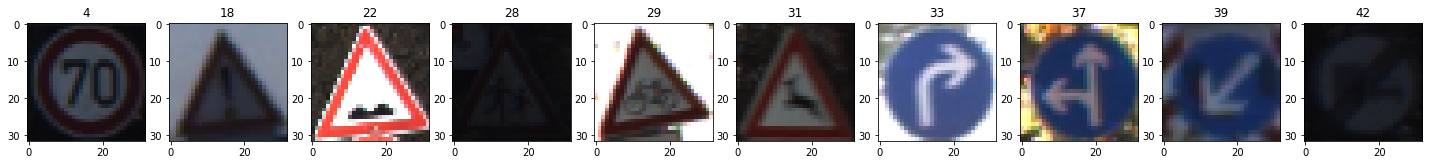

In [20]:
### Load the images and plot them here.

### Load image and resize to 32x32
def load_image(dir):
    return np.array([cv2.resize(mpimg.imread(dir + image), (32, 32)) for image in os.listdir(dir)])
### Plot image and label    
def plot_image(x,y):
    fig = plt.figure(figsize=(25,25))
    for idx, image in enumerate(x):
        fig.add_subplot(1, len(x), idx+1)
        plt.title(y[idx])
        plt.imshow(image) 
        
new_dataset = load_image("my_images/")
new_labels = np.array([4, 18, 22, 28, 29, 31, 33, 37, 39, 42])
#print (new_dataset.shape,X_test.shape)
plot_image(new_dataset, new_labels)
#preprocess data for new images
new_dataset = norm_data(new_dataset)
new_dataset, new_labels = shuffle(new_dataset, new_labels)

### Question1: Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

### Answer:
See above for the 10 German traffic signs I found online.

The channel for the images is also 3.That is great which means I don't have to change the channel to meet my model input requirement.

However, the shape is different than the previous data we used. 
The input size for LeNet model is 32x32 so we have to resize the image to feed the model. I used resize function in cv2 to change all the images to 32x32. 

And we can observe that the image28 which is really dark, because we use the normalized method to preprocess the data, the brightness may affect the result.

### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

### Top 5 Softmax Probabilities 
top5 = tf.nn.top_k(tf.nn.softmax(logits), k=5, sorted=True, name=None)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5_pred = sess.run(top5, feed_dict={x: new_dataset, keep_prob: 1.0})
    top5_prob = top5_pred[0]
    top5_indices = top5_pred[1]
    
    test_accuracy = evaluate(new_dataset, new_labels)
    print("New Images Accuracy = {:.3f}".format(test_accuracy))
#print (top5_prob)
#print (top5_indices)

New Images Accuracy = 0.900


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
cnt = 0
for idx in range(len(new_labels)):
    print ('New image class = ',new_labels[idx], ', and the model predict class = ', top5_indices[idx][0])
    if new_labels[idx] == top5_indices[idx][0]:
        print ('Success predict the traffic sign!!!')
        cnt += 1
    else:
        print ('Failed on predict the traffic sign...')
    print ()
print ()    
print ('Total Accuracy of New Images = ', cnt/len(top5_prob))    

New image class =  28 , and the model predict class =  23
Failed on predict the traffic sign...

New image class =  39 , and the model predict class =  39
Success predict the traffic sign!!!

New image class =  18 , and the model predict class =  18
Success predict the traffic sign!!!

New image class =  42 , and the model predict class =  42
Success predict the traffic sign!!!

New image class =  22 , and the model predict class =  22
Success predict the traffic sign!!!

New image class =  29 , and the model predict class =  29
Success predict the traffic sign!!!

New image class =  31 , and the model predict class =  31
Success predict the traffic sign!!!

New image class =  37 , and the model predict class =  37
Success predict the traffic sign!!!

New image class =  33 , and the model predict class =  33
Success predict the traffic sign!!!

New image class =  4 , and the model predict class =  4
Success predict the traffic sign!!!


Total Accuracy of New Images =  0.9


### Question2: Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set .

### Answer:

The code for making predictions of new images is above.

Here are the results of the prediction:

| Image			                                        |     Prediction	        			        		| 
|:-----------------------------------------------------:|:-----------------------------------------------------:| 
| Children crossing    		  			  	    		| Slippery road				 			            	|
| Speed limit (70km/h)      			  			 	| Speed limit (70km/h)     								| 
| General caution     				  			  		| General caution 										|
| Bumpy road				  			  				| Bumpy road											|
| Bicycles crossing				  			  			| Bicycles crossing	      						    	|
| Wild animals crossing     		  			  		| Wild animals crossing    								| 
| Turn right ahead     		  			  				| Turn right ahead 										|
| Go straight or left			  		                | Go straight or left									|
| Keep left	      		                                | Keep left			    		 				        |
| End of no passing by vehicles over 3.5 metric tons	| End of no passing by vehicles over 3.5 metric tons	|

The model had success to predict 9 of 10 new images, which gives an accuracy of 90%. It's pretty close to the accuracy of test data set 92.8%. I think this is acceptable result because the new test image is pretty similar to the previous dataset.

And we can also found out the image 28 fail to detect the class. If we change the image for RGB to HLS and isolate  Lightness channel to train the model, it might help on this case.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for idx in range(len(top5_prob)):
    print ('New images:', new_labels[idx])
    print ('Top five indices class = ', top5_indices[idx])
    print ('Top five Softmax Probabilities  = ', top5_prob[idx])   
    print ()    


New images: 28
Top five indices class =  [23 29 20  3 25]
Top five Softmax Probabilities  =  [ 0.64036554  0.20762357  0.06006555  0.01764729  0.01290865]

New images: 39
Top five indices class =  [39 37 40 33  4]
Top five Softmax Probabilities  =  [  9.82249379e-01   7.18331616e-03   6.76303450e-03   3.42683261e-03
   2.92044831e-04]

New images: 18
Top five indices class =  [18 26 27 11 24]
Top five Softmax Probabilities  =  [  9.98783767e-01   1.11815007e-03   8.20189816e-05   1.44036840e-05
   1.12947339e-06]

New images: 42
Top five indices class =  [42  6 41 12 10]
Top five Softmax Probabilities  =  [  9.64434087e-01   2.99351346e-02   1.57141616e-03   1.56420795e-03
   9.58980178e-04]

New images: 22
Top five indices class =  [22 25 29 31 26]
Top five Softmax Probabilities  =  [  9.95748580e-01   3.59557569e-03   6.55545795e-04   2.48882259e-07
   2.27901236e-08]

New images: 29
Top five indices class =  [29 28 23 30 24]
Top five Softmax Probabilities  =  [  8.83336544e-01   1.0

### Question3: Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. 

### Answer:
The code for output the top 5 softmax probabilities see above.

The module had success recognize most of new images except one.
Let's take look the result from top 5 softmax:

For the correct prediction result, the top 1 softmax probabilities is 0.88~1.0 which means the model is pretty confident for the result.

How about the false result image?
First, Let's take a look the top 5 softmax probabilities for the failed image: "Children crossing."

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .64         			| Slippery road   								| 
| .20     				| Bicycles crossing								|
| .06					| Dangerous curve to the right					|
| .01	      			| Speed limit (60km/h)					 		|
| .01				    | Road work      						    	|
From the result, we can find out 2 things.
First, the top 1 probability only 0.64 instead of 0.88~1.0 which means the model is not so confident for the result.
Second, we can't find Children crossing result on the top 5 probabilities.
What's more, some result had nothing related with Children crossing.
Above the result, I think the model had some difficulty either on Children crossing or brightness will affect the result .

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 